## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将读取微信好友数据，并做一些有趣的统计和分析:P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

**任务0 - 读取数据**

**任务1 - 统计微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

In [2]:
### 配置环境，安装项目所需package，此部分代码只需运行一次即可
### 无需修改以下代码
!pip install -r requirements.txt
!conda install -c conda-forge wordcloud --y

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.5.0            |   py36h470a237_0         383 KB  conda-forge

The following packages will be UPDATED:

    wordcloud: 1.4.1-py36_0 conda-forge --> 1.5.0-py36h470a237_0 conda-forge


wordcloud-1.5.0      | 383 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


---

## 任务0. 登陆并发送打招呼信息

### 导入项目所需包

In [3]:
### 以下内容无需改动，直接运行即可
# 导入项目中所需要的包
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
%matplotlib inline

print("所有库导入成功！")

所有库导入成功！


---
**注意：在教室中，我们仅提供假数据来完成项目，如果您倾向于探索自己微信好友的数据，您可以前往此[链接](https://github.com/udacity/AIPND-cn-trial)下载文件，并在本地运行。**

In [4]:
### 以下内容无需改动，直接运行即可
# 读取数据
dataset = pd.read_csv('wechat_friends.csv').fillna('').to_dict('records')

---

---

## 任务1. 好友男女比例

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

### 练习：打印数据
* 打印`dataset`的数据类型。
* 打印`dataset`中的第一条数据，以及其数据类型。
* 打印`dataset`中第一条数据的微信昵称。

### 提示：
* `print()`函数可以打印括号内的内容。

* `type()`函数可以提取括号内变量的数据类型。

* 对于列表的索引

如果有一个列表`lst`,我想提取它的第三条数据（注意第三条数据和索引2是对应的）：
```python
lst = [1,2,3,4,5]
print(lst[2])
```
输出
```python
3
```

* 对于字典的索引

如果有一个字典`color`,我想根据它的某一个键（key）提取对应值（value）：
```python
color = {'apple':'red','pear':'green','banana':'yellow'}
#这是一个水果对应颜色的字典
#我想获取‘pear’的颜色
print(color['pear'])
```
输出
```python
green
```


In [5]:
### TODO：打印dataset的数据类型
print(type(dataset))

<class 'list'>


In [6]:
### TODO：打印第一条数据及数据类型
print(dataset[0])

{'NickName': 'Myself', 'Province': '江苏', 'City': '南京', 'Sex': 2.0, 'Signature': 'Enjoy<span class="emoji emoji1f49d"></span>'}


In [7]:
### TODO：打印第一条数据的微信昵称
print(dataset[0]['NickName'])

Myself


### **问题2**
dataset的数据类型是什么？dataset中第一条数据的数据类型呢？根据你的理解，这两种数据类型的区别是什么？

回答：dataset是列表；其第一条数据类型是字典。区别：列表是有序的，可以通过索引值访问，而字典是无序的；列表存储数据是[value1,value2,value3],而字典储存数据是以{key:value} 的形式存储。

### 练习：统计男女比例
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中。


### 提示：
- `dataset`中1表示男性、2表示女性，如果不是1也不是2，那就是unknown啦；
- 虽然我们这里没有要求，但是实际的名单中，索引为`0`的实际是自己；
- 本道题目需要使用`for`循环

下面是一个`for`循环示例

```python
#一个城市列表
cities = ['new york city', 'mountain view', 'chicago', 'los angeles']

#循环输出每一个城市的名字
for city in cities:
    print(city)
```
输出会在每一行打印城市名字
```python
new york city
mountain view
chicago
los angeles
```

- 本道题目需要使用`if..elif..else`条件语句

下面是一个条件语句与`for`循环混合示例

我们需要判断num_list中的数字与3和7的大小关系
```python
num_list = [1,5,10]
for num in num_list:
    if num < 3:
        print(num,'这个数字小于3')
    elif 7>=num>=3:
        print(num,'这个数字大于等于3，小于等于7')
    else:
        print(num,'这个数字大于7')
```
输出
```python
1 这个数字小于3
5 这个数字大于等于3，小于等于7
10 这个数字大于7
```

In [8]:
# TODO：统计好友性别
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}
for index in range(len(dataset)):
    temp = dataset[index]['Sex']
    if temp == 1.0:
        sex['male'] += 1
    elif temp == 2.0:
        sex['female'] += 1
    else:
        sex['unknown'] += 1
print(sex)
    

{'male': 77, 'female': 24, 'unknown': 9}


In [9]:
### 以下内容无需改动，直接运行即可
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，有", sex['unknown'], "位好友未填写。")

我的好友中共有 77 位男性、 24 位女性，有 9 位好友未填写。


In [10]:
### 以下内容无需改动，直接运行即可
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title("My Wechat Friends' Sex Ratio")
plt.show()

这段代码的作用是绘制饼图，是不是很有趣？

**饼状图**是一种常见的单变量图形，用于描绘分类变量级别的相对频率。饼图中的频率用圆形的扇区表示：角度或面积越大，该分类值就越常见。

在「人工智能编程基础」这门课的第二章节中，将讲解如何使用`matplotlib`和`seaborn`绘制各种统计图表，进行数据可视化。

---

## 任务2. 好友地域分布
### 练习：统计好友省份
使用`list`中`append()`方法将好友省份添加至`province`中，注意**要去除空的字符串**




### 提示：
* 可以用`for`循环实现，具体的`for`循环我们已经在上一节实现过了哦，相信聪明的你可以再一次做到的！
* 这里要去除的空字符串，指的是好友省份信息中为空的那些。**空字符串是`''`**，你可以用`==`来判断它。
* `append()`方法应用示例：
```python
lst = ['a','b','c']
lst.append('d')
print(lst)
```
输出
```python 
['a','b','c','d']
```

In [11]:
### TODO：将好友所在省份（不为空）添加到 province 中
province = []
for index in range(1,len(dataset)):
    temp = dataset[index]['Province']
    if temp !=  '' :
        province.append(temp)
print(province)


['江苏', 'Know City', '江苏', '江苏', '江苏', '江苏', '陕西', '江苏', 'Firenze', '江苏', 'Hsinchu City', '湖南', '江苏', '江苏', '浙江', '江苏', '上海', '北京', '江苏', '江苏', '江苏', '江苏', '四川', '云南', '四川', '江苏', '上海', '陕西', '北京', '台湾', '浙江', '上海', '江苏', '广东', '江苏', '江苏', '江苏', '北京', '广东', '广东', '北京', '广东', '河南', '安徽', '江苏', '江西', '浙江', '江苏', '北京', '上海', '广东', '广东', '上海', '福建', '广东', '上海', '湖南', '江苏', '北京', '上海', '江苏', '广东', '河北', '上海', '江苏', '江苏', '北京', '上海', '江苏', '北京', '北京', '江苏', '天津', '浙江', '广东', '江苏', '上海', '湖北', '北京', '贵州', '江苏', '北京', '江苏', '巴黎', '上海', '上海', '上海', '江苏', '江苏', '广东', '上海', '陕西', '上海', '江苏', '上海', '陕西']


In [12]:
### 以下内容无需修改，直接运行即可
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

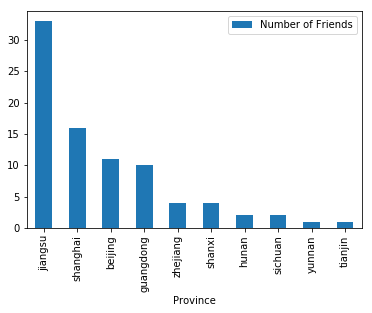

In [13]:
### 以下内容无需修改，直接运行即可
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

**条形图**用于描述分类变量的分布情况。在条形图中，分类变量的每个级别用长条表示，高度表示数据在该级别的出现频率。

---

## 任务3. 生成好友个性签名词云图

在这里我们希望生成词云，只需要调用第三方库即可，Python有大量的库可以使用，能极大提高开发效率，是编程入门的绝佳选择。

### 练习：打印个性签名
* 使用`print()`语句打印出第2条签名
### 提示：
* 列表的索引我们在前面已经实现过了哦，不记得了可以再去看看
* **注意**：索引的2和实际的第2条是有区别的哦！

In [14]:
### TODO：打印出第2条签名
print(dataset[1]['Signature'])

每一天，为明天。自己是一切的根源！


In [15]:
### 以下内容无需修改，直接运行即可
from wordcloud import WordCloud
import jieba

tList = []
for i in dataset:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.415 seconds.
Prefix dict has been built succesfully.


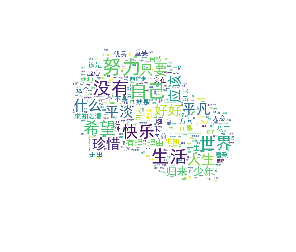

In [16]:
### 以下内容无需修改，直接运行即可
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./SimHei.ttf').generate(wl_space_split)


plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join("wechatfriends_wordcloud.png"))

---

## 任务4. 对好友签名进行情感分析

在这部分内容中，我们调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。一般来说，情感分析的目的是为了找出作者观点的态度，是正向还是负向，或者更具体的，我们希望知道他的情绪。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。

运行以下代码试试看！

---
### 知识小贴士
同学，理解情感分析其实很简单哦！

自然语言处理的很多任务也会应用到机器学习的方法。

我们首先会将问题定位，情感分析到底是一个分类（预测已知情感的类型）还是回归（预测情感强弱的程度），还是聚类（通过算法自动得出情感类型）。

以我们作业中的情感分析为例，这里是一个回归问题，也就是说我们预测的是一个连续的数值，这个数值的强弱决定了情感的强弱。

如果我们把整个情感分析的接口看一个工厂，那么我们输入的文本就是原材料，输出的成品就是情感的强弱度，那么当然机器学习的算法就扮演了加工的角色啦（虽然事实上会复杂很多，不过在初期我们可以简单地这么理解）。

因此，采用什么样的手段来加工我们输入的文本，就能决定最终我们得出的强弱度的精确程度。

算法层面能处理文本的方式上有很多，例如传统的TF-IDF啦，最大熵模型啦，以及我想大家都很感兴趣的深度学习的等还有很多，感兴趣的话可以对自然语言处理做一些功课，能够有更深的认识。

情感分析的应用也很多，我来举两个栗子：
* 通过情感分析，对金融领域用户生成的文本分析，可以起到对金融市场的监控和股价异常处理的重要作用；
* 我们常常会在电商网站上留下点评，通过这些文本的情感分析，能够更好地理解用户对商品的喜好，进而制定营销策略。

总而言之，情感分析能够很好地帮助理解用户的喜好，根据不同喜好来做出更好的决定哦，对于市场研究来说，是一个很有利的工具。

---

In [17]:
### 以下内容无需修改，直接运行即可
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

0.6851400314498396


接下来，我们将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

### 练习：统计好友签名情感分析结果比例
* 统计sentiments中**大于0.66**的个数
* 统计sentiments中**大于等于0.33且小于等于0.66**的个数
* 统计sentiments中**小于0.33**的个数

### 提示：
* 本题可以用`for`循环语句和对应的`if`条件语句实现，我们在前面给出过例子，同时相信你自己也已经很熟悉了~

In [18]:
### 以下内容无需修改，直接运行即可
sentiments = []
for i in tList:
    sentiments.append(SnowNLP(i).sentiments) 


In [19]:
### TODO：统计sentiments中大于0.66的个数
positive = 0

### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = 0

### TODO：统计sentiments中小于0.33的个数
negative = 0
for index in range(len(sentiments)):
    if sentiments[index] > 0.66:
        positive += 1
    elif sentiments[index] >= 0.33:
        neutral += 1
    else :
        negative += 1

In [21]:
### 以下内容无需修改，直接运行即可
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)。同时，你也需要下载 ipynb 文件，并且把这个 HTML 和下载下来的 iPython notebook 一起做为你的作业提交。**